In [1]:
import tensorflow as tf
import os

2024-12-04 20:25:22.256633: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import cv2
import imghdr

In [3]:
data_dir = 'data' 

In [4]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [5]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()

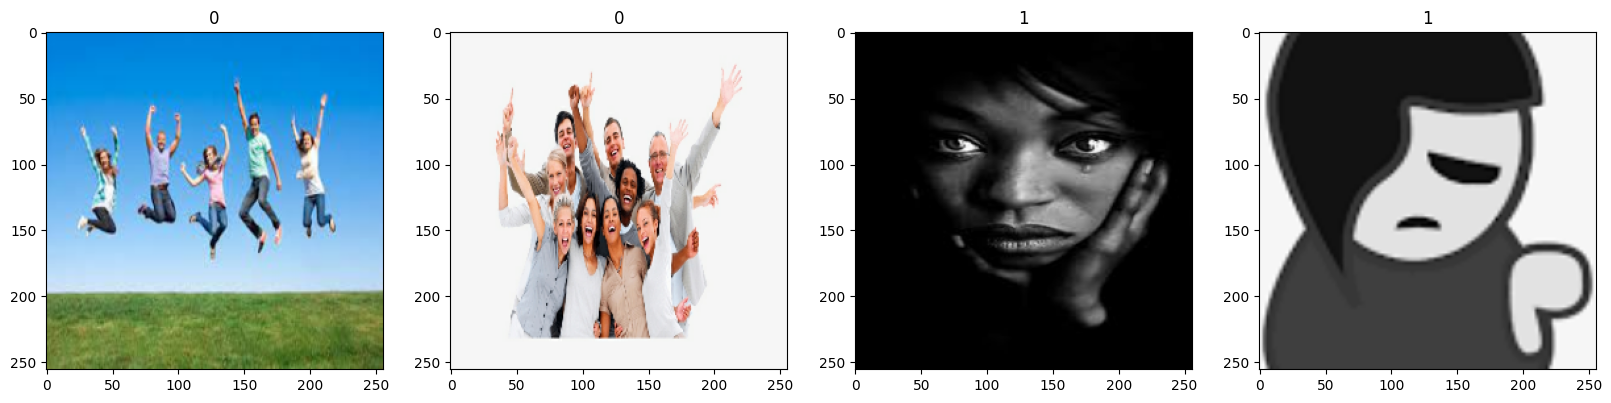

In [10]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [11]:
data = data.map(lambda x,y: (x/255, y))

In [12]:
data.as_numpy_iterator().next()

(array([[[[0.6       , 0.5921569 , 0.6039216 ],
          [0.60043657, 0.59259343, 0.60435814],
          [0.6039216 , 0.59607846, 0.60784316],
          ...,
          [0.8666667 , 0.85882354, 0.87058824],
          [0.8666667 , 0.85882354, 0.87058824],
          [0.8666667 , 0.85882354, 0.87058824]],
 
         [[0.6022442 , 0.59440106, 0.60616577],
          [0.60243094, 0.5945878 , 0.6063525 ],
          [0.604338  , 0.59649485, 0.60825956],
          ...,
          [0.8666667 , 0.85882354, 0.87058824],
          [0.8666667 , 0.85882354, 0.87058824],
          [0.8666667 , 0.85882354, 0.87058824]],
 
         [[0.6039633 , 0.5961202 , 0.6078849 ],
          [0.60504746, 0.5972043 , 0.60896903],
          [0.6055662 , 0.59772307, 0.6094878 ],
          ...,
          [0.8666667 , 0.85882354, 0.87058824],
          [0.8666667 , 0.85882354, 0.87058824],
          [0.8666667 , 0.85882354, 0.87058824]],
 
         ...,
 
         [[0.74524355, 0.7374004 , 0.7491651 ],
          [0.75032

# 5. Split Data

In [13]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [14]:
train_size

7

In [15]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [16]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

# 7. Train

In [22]:
logdir='logs'

In [23]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [24]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 12s 1s/step - loss: 0.6766 - accuracy: 0.5804 - val_loss: 0.6462 - val_accuracy: 0.5469
Epoch 2/20
7/7 [==============================] - 9s 1s/step - loss: 0.5960 - accuracy: 0.7009 - val_loss: 0.5010 - val_accuracy: 0.7344
Epoch 3/20
7/7 [==============================] - 8s 965ms/step - loss: 0.4881 - accuracy: 0.7634 - val_loss: 0.3459 - val_accuracy: 0.8125
Epoch 4/20
7/7 [==============================] - 9s 1s/step - loss: 0.3376 - accuracy: 0.9062 - val_loss: 0.2150 - val_accuracy: 0.9219
Epoch 5/20
7/7 [==============================] - 8s 977ms/step - loss: 0.2533 - accuracy: 0.9286 - val_loss: 0.2148 - val_accuracy: 0.9219
Epoch 6/20
7/7 [==============================] - 8s 977ms/step - loss: 0.1879 - accuracy: 0.9464 - val_loss: 0.0825 - val_accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 8s 975ms/step - loss: 0.1371 - accuracy: 0.9643 - val_loss: 0.0869 - val_accuracy: 0.9844
Epoch 8/20
7/7 [============

# 8. Plot Performance

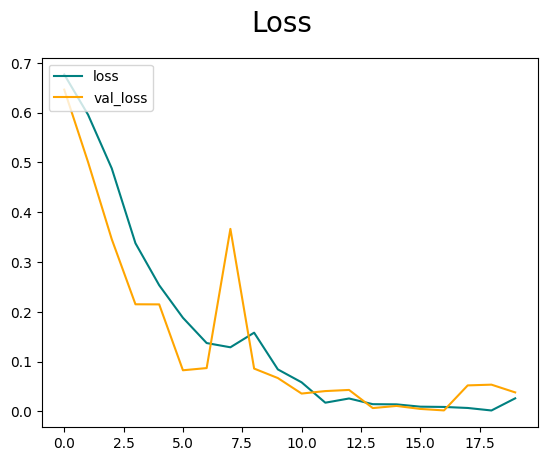

In [25]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

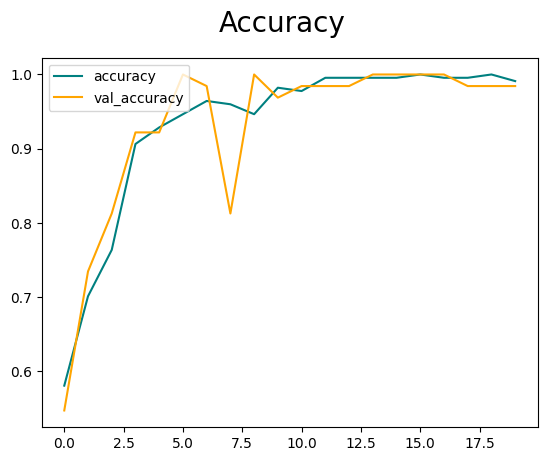

In [26]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [27]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [28]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [29]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 196ms/step


In [30]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [31]:
import cv2

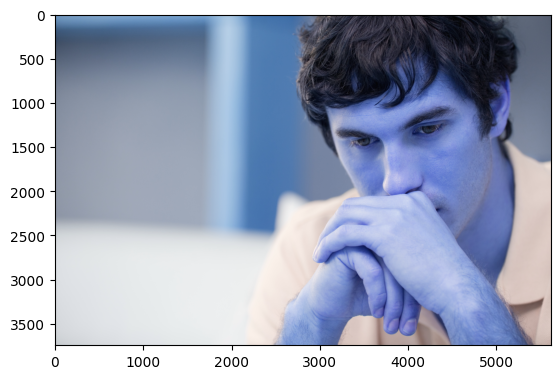

In [32]:
img = cv2.imread('8iAb9k4aT.jpg')
plt.imshow(img)
plt.show()

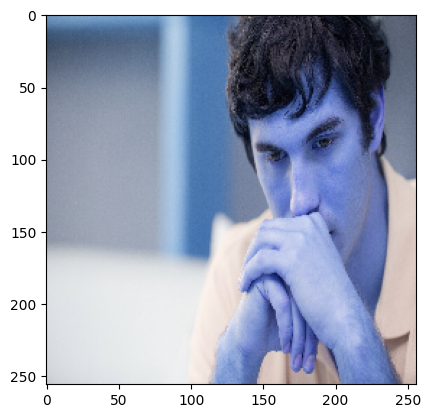

In [33]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [34]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 27ms/step


In [35]:
yhat

array([[0.96399784]], dtype=float32)

In [36]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


# 11. Save the Model

In [37]:
from tensorflow.keras.models import load_model

In [38]:
model.save(os.path.join('models','imageclassifier.h5'))

/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
